In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20,30)

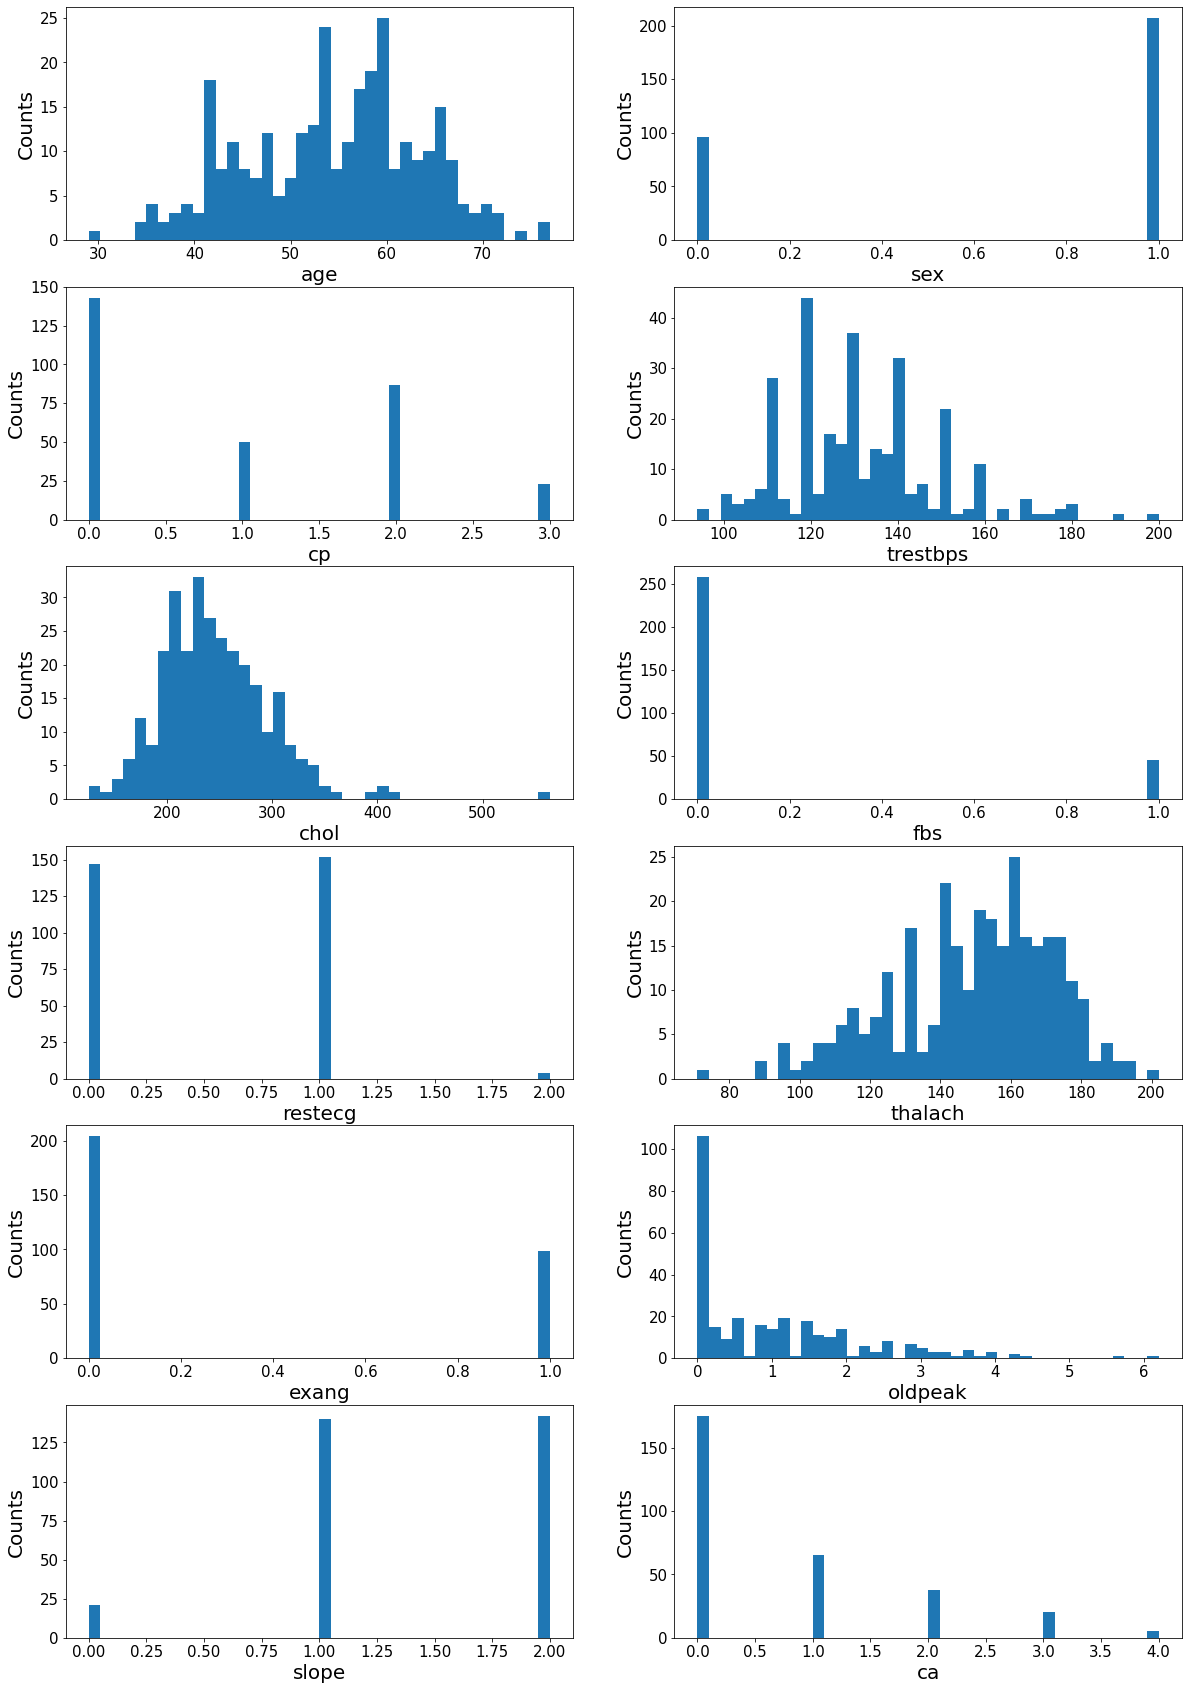

In [5]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 6, ncols = 2)

# Specify the features of interesxaxes = num_features
num_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca']
xaxes = num_features
yaxes = ['Counts', 'Counts','Counts','Counts','Counts','Counts','Counts','Counts','Counts','Counts','Counts','Counts']


# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

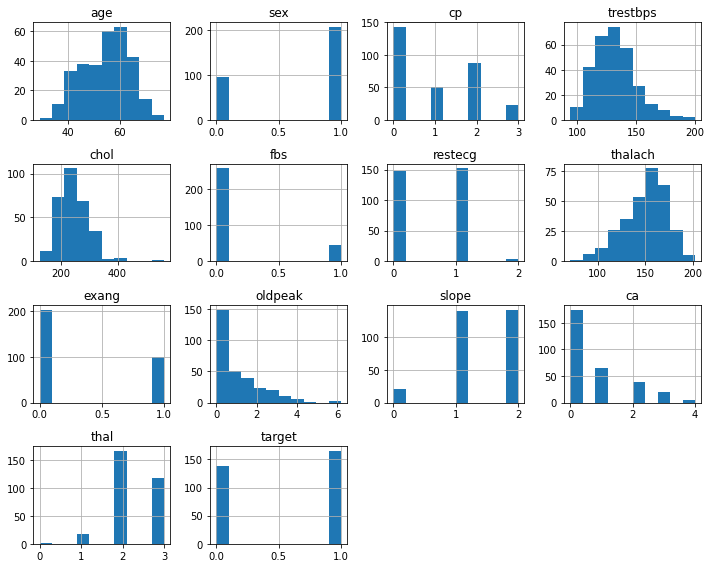

In [6]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

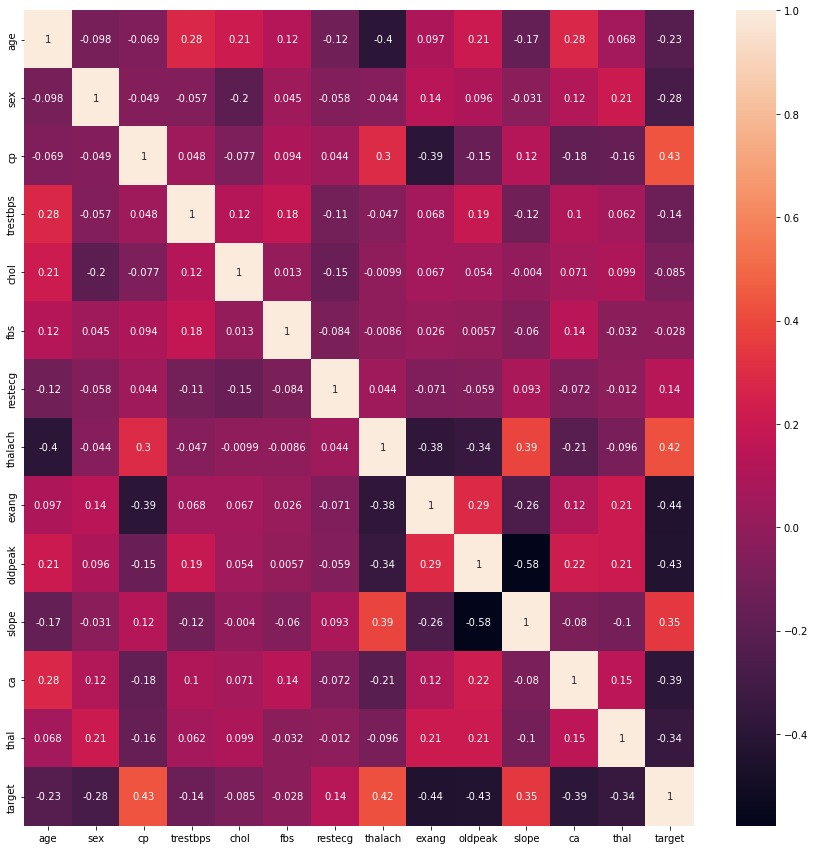

In [8]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
# set up the figure size
plt.rcParams['figure.figsize'] = (8,8)

Text(0.5, 0, 'x')

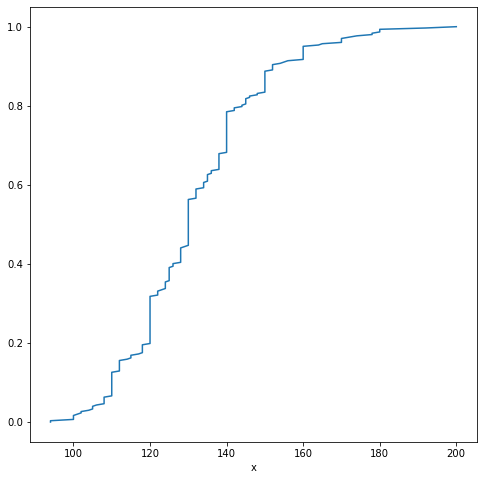

In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

#define random sample of data
data = df['trestbps']

#sort data
x = np.sort(data)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)

#plot CDF
plt.plot(x, y)
plt.xlabel('x')

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

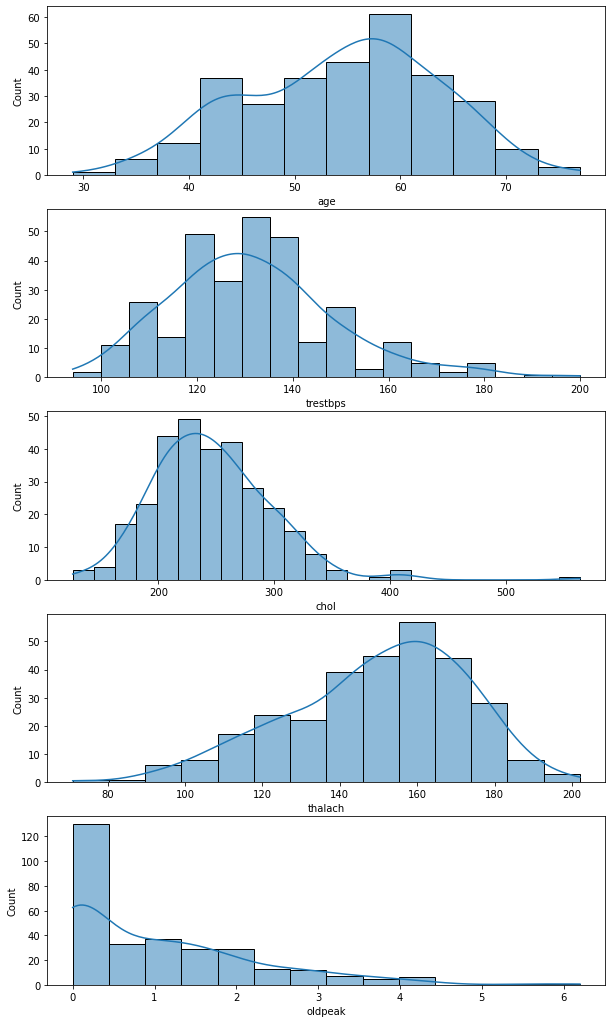

In [11]:
# distribution plot for numeric variables
fig, ax = plt.subplots(5,1, figsize=(10,18))
sns.histplot(df['age'], ax=ax[0], kde=True)
sns.histplot(df['trestbps'], ax=ax[1], kde=True)
sns.histplot(df['chol'], ax=ax[2], kde=True)
sns.histplot(df['thalach'], ax=ax[3], kde=True)
sns.histplot(df['oldpeak'], ax=ax[4], kde=True)

In [12]:
import statsmodels.formula.api as smf
formula = 'target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca';
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     24.06
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           5.77e-37
Time:                        21:04:36   Log-Likelihood:                -114.02
No. Observations:                 303   AIC:                             254.0
Df Residuals:                     290   BIC:                             302.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6784      0.294      2.304      0.022       0.099       1.258
age           -0.0010      0.003     -0.357      0.721      -0.006       0.004
sex           -0.2275      0.047     -4.841      0.000      -0.320      -0.135
cp             0.1181      0.023      5.201      0.000       0.073       0.163
trestbps      -0.0021      0.001     -1.667      0.097      -0.005       0.000
chol          -0.0005      0.000     -1.197      0.232      -0.001       0.000
fbs            0.0283      0.061      0.467      0.641      -0.091       0.148
restecg        0.0443      0.041      1.091      0.276      -0.036       0.124
thalach        0.0029      0.001      2.500      0.013       0.001       0.005
exang         -0.1614      0.052     -3.104      0.002      -0.264      -0.059
oldpeak       -0.0674      0.023     -2.907      0.004      -0.113      -0.022
slope          0.0781      0.043      1.811      0.071      -0.007       0.163
ca            -0.1059      0.022     -4.776      0.000      -0.150      -0.062
==============================================================================
Omnibus:                        7.875   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.857
Skew:                          -0.362   Prob(JB):                       0.0197
Kurtosis:                       2.685   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
import statsmodels.api as sm
# defining the dependent and independent variables
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca']]
y = df[['target']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4,random_state=42) 
# building the model and fitting the data

log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.341010
         Iterations 7


In [16]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  181
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.5071
Time:                        21:05:35   Log-Likelihood:                -61.723
converged:                       True   LL-Null:                       -125.24
Covariance Type:            nonrobust   LLR p-value:                 6.951e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0187      0.025      0.750      0.453      -0.030       0.068
sex           -1.6888      0.566     -2.982      0.003      -2.799      -0.579
cp             1.0252      0.254      4.039      0.0

In [17]:
ypred = results.predict(X)
print(ypred)

0      0.619966
1      0.592047
2      0.931252
3      0.795968
4      0.653122
         ...   
298    0.502116
299    0.812797
300    0.093798
301    0.155785
302    0.815306
Length: 303, dtype: float64


In [24]:
# performing predictions on the test datdaset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
# comparing original and predicted values of y
#print('Actual values', list(ytrain.values))
print('Predictions :', prediction)



Predictions : [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]


In [27]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(ytest, prediction)
print ("Confusion Matrix : \n", cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[45  7]
 [13 57]]
Test accuracy =  0.8360655737704918


In [19]:
df.describe(percentiles=[.01,.015,.02,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,1.5%,2%,10%,20%,30%,...,50%,60%,70%,80%,90%,95%,96%,98%,99%,max
age,303.0,54.366337,9.082101,29.0,35.00,35.00,35.08,42.0,45.0,50.0,...,55.0,58.00,59.0,62.0,66.0,68.0,68.920,70.00,71.00,77.0
sex,303.0,0.683168,0.466011,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0
cp,303.0,0.966997,1.032052,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,2.0,2.0,2.0,3.0,3.000,3.00,3.00,3.0
trestbps,303.0,131.623762,17.538143,94.0,100.00,100.00,101.04,110.0,120.0,120.0,...,130.0,134.00,140.0,144.0,152.0,160.0,169.600,177.84,180.00,200.0
chol,303.0,246.264026,51.830751,126.0,149.00,153.24,160.16,188.0,204.0,217.6,...,240.0,254.00,268.0,285.2,308.8,326.9,334.600,353.96,406.74,564.0
fbs,303.0,0.148515,0.356198,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,1.0,1.0,1.000,1.00,1.00,1.0
restecg,303.0,0.528053,0.525860,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,1.0,1.00,1.0,1.0,1.0,1.0,1.000,1.00,1.98,2.0
thalach,303.0,149.646865,22.905161,71.0,95.02,96.00,97.08,116.0,130.0,140.6,...,153.0,159.00,163.0,170.0,176.6,181.9,182.000,186.96,191.96,202.0
exang,303.0,0.326733,0.469794,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,1.0,1.0,1.0,1.0,1.000,1.00,1.00,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.8,1.12,1.4,1.9,2.8,3.4,3.592,4.00,4.20,6.2


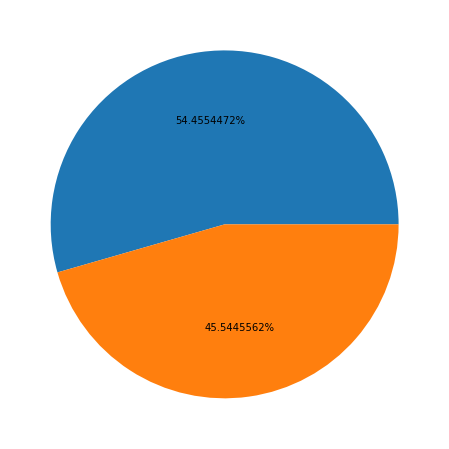

In [20]:
plt.pie(df["target"].value_counts(),autopct="%f2%%")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom



# Neural Network Model

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [31]:
df_new = df
target_column = ['target'] 
predictors = list(set(list(df_new.columns))-set(target_column))
df_new[predictors] = df_new[predictors]/df_new[predictors].max()
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,0.706056,0.117949,0.376623,0.616883,0.714286,0.792208,1.0
sex,303.0,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.0
cp,303.0,0.322332,0.344017,0.000000,0.000000,0.333333,0.666667,1.0
trestbps,303.0,0.658119,0.087691,0.470000,0.600000,0.650000,0.700000,1.0
chol,303.0,0.436638,0.091898,0.223404,0.374113,0.425532,0.486702,1.0
fbs,303.0,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.0
restecg,303.0,0.264026,0.262930,0.000000,0.000000,0.500000,0.500000,1.0
thalach,303.0,0.740826,0.113392,0.351485,0.660891,0.757426,0.821782,1.0
exang,303.0,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.0
oldpeak,303.0,0.167678,0.187270,0.000000,0.000000,0.129032,0.258065,1.0


In [32]:
X = df_new[predictors].values
y = df_new[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(212, 13)
(91, 13)


In [39]:
# Use MLP neural networkk classifier with 10 x 10 x 10 layers and 1000 max iterations
mlp = MLPClassifier(hidden_layer_sizes=([10,50,10]),activation='relu', solver='adam', max_iter=2000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [40]:
#Let's look at the confusion matrix for the training data
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[ 73  25]
 [  9 105]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        98
           1       0.81      0.92      0.86       114

    accuracy                           0.84       212
   macro avg       0.85      0.83      0.84       212
weighted avg       0.85      0.84      0.84       212



In [41]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[34  6]
 [ 3 48]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.89      0.94      0.91        51

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

